# **Initial Visualisation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Load the dataset
df = pd.read_csv('data/cleaned_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Over weight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Over weight
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,Obesity
1333,18,female,31.920,0,no,northeast,2205.98080,Obesity
1334,18,female,36.850,0,no,southeast,1629.83350,Obesity
1335,21,female,25.800,0,no,southwest,2007.94500,Over weight


### **1. checking the disribution of the 'charges' column**

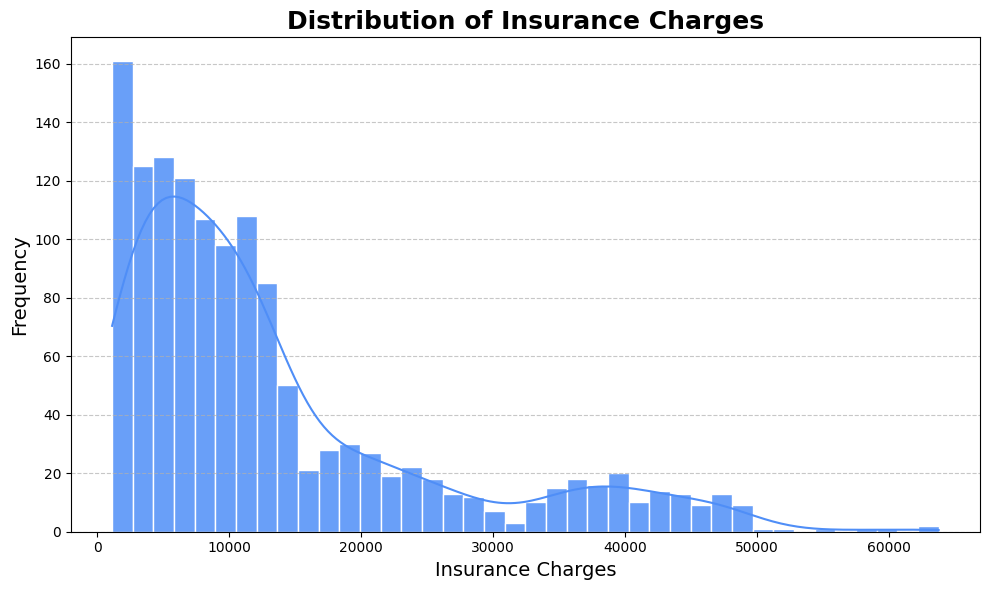

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='#4F8EF7', bins=40, edgecolor='white', alpha=0.85)
plt.title('Distribution of Insurance Charges', fontsize=18, fontweight='bold')
plt.xlabel('Insurance Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **2. Checking how Does BMI (or BMI Category) Affect Insurance Charges**

In [28]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', 
                 title='Insurance Charges by BMI',
                 labels={'bmi': 'BMI', 'charges': 'Charges', 'smoker': 'Smoker'})
fig.show()


###  Insight

From the scatter chart, i observe:

- This suggests that smoking status is a major factor in determining insurance costs.
- Among non-smokers, there is a weak to moderate positive correlation between BMI and insurance charges, but the increase in charges is not as dramatic.
- Smokers with high BMI (especially >30, categorized as obese) tend to have the highest charges, indicating compounding risk factors.
- While there’s some correlation between BMI and charges, smoking status dramatically amplifies the effect. BMI alone does not explain the wide range in insurance costs.

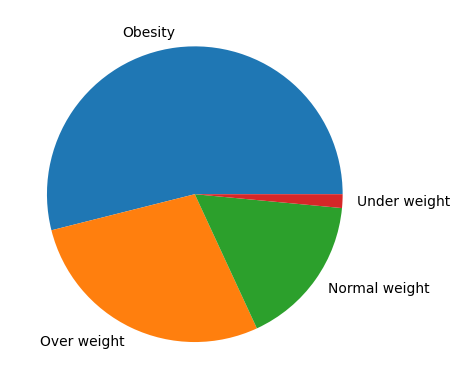

In [54]:
# Pie hart of bmi_categories column
bmi_category_counts= df['bmi_category'].value_counts()
plt.pie(x=bmi_category_counts, labels=bmi_category_counts.index)
plt.show()

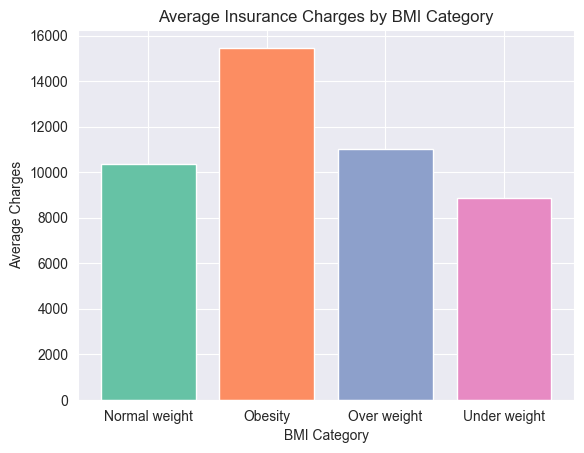

In [30]:
# Ensure bmi_charges is defined before this cell is run.
# If not, define it as follows:

bmi_charges = df.groupby('bmi_category')['charges'].mean().reset_index()

sns.set_style('darkgrid')
plt.figure()
bars = plt.bar(
    x=bmi_charges['bmi_category'].astype(str),
    height=bmi_charges['charges'],
    color=colors,  # colors is already defined in the notebook
    label=bmi_charges['bmi_category']
)
plt.title('Average Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.show()


###  Insight

From the bar chart, i observe:

- Obese individuals tend to have the highest average insurance charges, likely due to associated health risks.
- Underweight and normal BMI individuals generally incur lower charges.
- There's a clear increasing trend in charges from normal → overweight → obese, showing that higher BMI correlates with higher medical costs.

### **3. Cheking how Do Insurance Charges Vary with Age**

In [33]:
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    color_discrete_map={'yes': '#e74c3c', 'no': '#3498db'},
    title='Insurance Charges by Age',
    labels={'age': 'Age', 'charges': 'Charges', 'smoker': 'Smoker Status'},
)
fig.update_layout(legend_title_text='Smoker Status')
fig.show()


### Insights

From this scatter plot i observed, 
- Insurance charges generally increase with age, especially for older individuals.
- Individuals under 30 who do not smoke tend to have very low insurance charges, indicating minimal risk.
- Even younger individuals who smoke face higher charges compared to their non-smoking peers, reflecting early risk penalization.
- There’s a noticeable curve: older smokers face the highest insurance costs, suggesting that age amplifies the risk associated with smoking.
- The difference in charges between smokers and non-smokers becomes more pronounced with increasing age, suggesting an interaction effect where both age and smoking compound the health risk.

### **4. Checking is there a difference in charges by region**

In [ ]:
fig = px.box(df, x='region', y='charges', color='region',
             title='Insurance Charges by Region',
             labels={'region': 'Region', 'charges': 'Charges'},
             color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()


### Insight

From the boxplot,
* All four regions have comparable median charges, suggesting that geographic location alone doesn’t greatly affect average insurance cost.
* The Southeast region appeared to have a higher median insurance cost and more outliers compared to other regions. 
* Southwest and Northwest regions show less variability in charges, suggesting more consistent pricing and potentially a lower concentration of high-risk individuals.
* This suggests that regional factors might influence insurance pricing — potentially due to demographics, lifestyle, or healthcare costs in different areas

### **5. Cheking average insurance charges by number of children**

In [32]:
# Calculate average charges by number of children
avg_charges_by_children = df.groupby('children')['charges'].mean()

# Convert Series to DataFrame for Plotly
avg_charges_by_children_df = avg_charges_by_children.reset_index()
avg_charges_by_children_df.columns = ['children', 'charges']

fig = px.bar(
    avg_charges_by_children_df,
    x='children',
    y='charges',
    labels={'children': 'Number of Children', 'charges': 'Average Charges'},
    title='Average Insurance Charges by Number of Children',
    color='children',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()


### Insight

- Average Insurance Charges by Number of Children
    * Individuals with no children have an average insurance charge of $12,384.70.
    * As the number of children increases from 0 to 3, the average insurance charges generally increase, peaking at $15,355.32 for those with 3 children.
    * Interestingly, charges slightly drop for those with 4 children ($13,850.66), and significantly decrease for individuals with 5 children ($8,786.04).